In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pydub import AudioSegment, silence
import os

In [2]:
def visualizeFile(audioPath):
    audio_file_path = audioPath
    signal, sr = librosa.load(audio_file_path, sr=44100)

    # Visualize waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

    # Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(signal, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Visualize spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

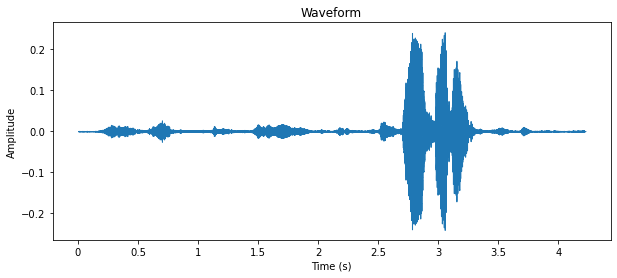

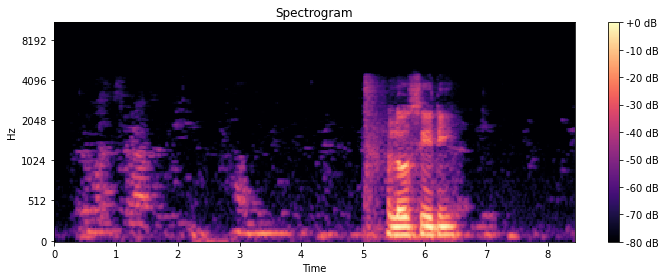

In [3]:
visualizeFile("./data/speaker1/Recording (1).wav")

In [10]:
def preprocessAudio(audioPath,outPath):
    # Load the audio file
    audio = AudioSegment.from_file(audioPath)

    # Define the minimum length of silence to be considered as "silent"
    min_silence_len = 100 # in milliseconds

    # Define the silence threshold in dBFS (decibels relative to full scale)
    silence_thresh = -40 # in dBFS

    # Split the audio into parts separated by silence
    parts = silence.split_on_silence(audio, min_silence_len=min_silence_len, silence_thresh=silence_thresh)

    # Combine the parts back into a single audio file
    output_audio = parts[0]
    for part in parts[1:]:
        output_audio += part

    # Normalize the audio
    # output_audio = librosa.util.normalize(output_audio)
    
    # Export the output audio file
    output_audio.export(outPath, format="wav")

In [11]:
preprocessAudio("data/speaker1/Recording (1).wav","processedData/speaker1/Recording (1).wav")

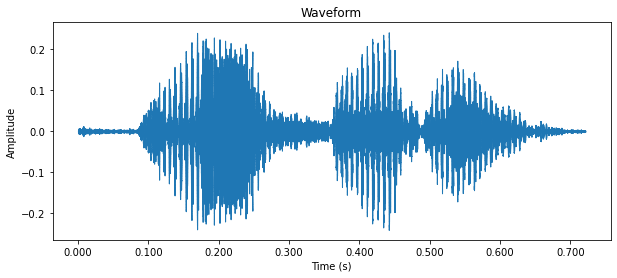

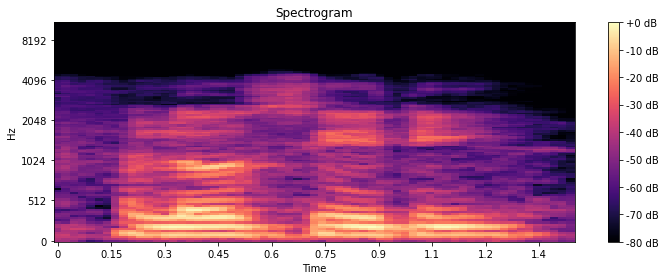

In [12]:
visualizeFile("processedData/speaker1/Recording (1).wav")

In [ ]:
def clone():
    directory_path = "./data/"
    for i in os.listdir(directory_path):
#         print(i)
        if not os.path.exists(os.path.join("./processedData/",i)):
#             If not, create the folder
            os.makedirs(os.path.join("./processedData/", i))

In [ ]:
clone()

In [ ]:
def preprocessAllAudio():
    directory_path = "./data/"
    for i in os.listdir(directory_path):
        for j in os.listdir(os.path.join(directory_path,i)):
#             print(os.path.join(directory_path,i,j))
            preprocessAudio(os.path.join(directory_path,i,j),os.path.join("./processedData/",i,j))

In [ ]:
preprocessAllAudio()

In [ ]:
preprocessAudio(os.path.join("./test/","speaker3/","Recording.wav"),os.path.join("./test/","Recording1.wav"))